<a href="https://colab.research.google.com/github/bartoszkozakiewicz/DeepLearning/blob/main/Twitter_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Sentiment - disaster or not

In [ ]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# Get helper functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-02-21 17:16:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-02-21 17:16:17 (91.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
#Import helper functions
import helper_functions as hp

# Get a text dataset

The dataset that from Kaggle:
https://www.kaggle.com/competitions/nlp-getting-started

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2023-02-21 17:16:21--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.128, 142.250.152.128, 142.250.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2023-02-21 17:16:21 (125 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
hp.unzip_data("nlp_getting_started.zip")

# Becoming one with the data - Visualizing a text dataset


In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df["text"][1]

'Forest fire near La Ronge Sask. Canada'

In [ ]:
#Shuffle training dataframe 
train_df_shuffles = train_df.sample(frac=1, random_state=42) # frac=1 mowi, że 100% danych mieszamy
train_df_shuffles.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
#Check test datafram
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# How many examples of each class - Czy zbalansowane
train_df["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
#How many samples 
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
#Visualizing some random training examples
import random

train_df.iloc[random.randint(0,len(train_df_shuffles))][['text','target']]

text      Some great footage of STRONG work from San Ber...
target                                                    1
Name: 7299, dtype: object

In [ ]:
import random
random_index = random.randint(0,len(train_df_shuffles)-5)
for row in train_df_shuffles[['text','target']][random_index : random_index+5].itertuples():#itertuples zmienia w tuple dane - bo tak w 1 stringu
  _,text,target=row
  print(f"Target: {target}", "- real disaster" if target >0 else "- not real disaster")
  print(f"Test:\n{text}\n")
  print("---\n")


Target: 0 - not real disaster
Test:
Loved Chicago so much that it game me Pink Eye. Now I sit and design in quarantine and in the dark.

---

Target: 0 - not real disaster
Test:
LRT LOOK AT ALL MY TOM FEELS FLOODING BACK

---

Target: 0 - not real disaster
Test:
100  1' MIX NEW FLAT DOUBLE SIDED LINERLESS BOTTLE CAPS YOU CHOOSE MIX FLATTENED - Full reÛ_ http://t.co/w00kjPrfdR http://t.co/mIXl1pFRJe

---

Target: 0 - not real disaster
Test:
New cocktail on the list! El Diablo Mas Verde: mezcal yellow chartreuse honey cucumber hellfire bitters.... http://t.co/REuosJEK4m

---

Target: 1 - real disaster
Test:
Bend Post Office roofers cut gas line prompt evacuation - http://t.co/6mF7eyZOAw

---



# Split data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffles["text"].to_numpy(),
                                                                            train_df_shuffles["target"].to_numpy(),
                                                                            test_size=0.1,#10%of training data for validation split
                                                                            random_state=42)

In [ ]:
# Check lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
#Check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

# Converting text to numbers

* Tokenazation- direct mapping word - number
* Embedding - create a matric of feature vector for each word/token

# Text vectorization(tokenization)

In [ ]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
#Use default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=None,#how many word in the the vocabulary (Automatically add <OOV> - means out of vocabulary)
                                                    #Jakbysmy dali np max=10000 to wybraloby 10000 most common words, a reszta by była replaced
                                                    # tokenem <OOV>
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,#Create groups of n words
                                    output_mode="int",#How to map tokens to numbers
                                    output_sequence_length=None,#how long do you want your sequences to be?
                                    pad_to_max_tokens=None) 

In [ ]:
train_sentences[0].split(), len(train_sentences[0].split())

(['@mogacola', '@zamtriossu', 'i', 'screamed', 'after', 'hitting', 'tweet'], 7)

In [ ]:
all_sum = sum([len(i.split()) for i in train_sentences])#Dlugosc kazdego ze zdan, po czym zsumowana

In [ ]:
#Average
round(all_sum/len(train_sentences))

15

In [ ]:
#Setup text vectorization variables
max_vocab_length = 10000 # MAx number of words to habe in our vocabulary
max_length =15 # max length our sequences will be (np how many words from tweet does a model see)

#Building Vectorizer using our hyperparameters
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
#Metoda adapt
#Fit the text vectorizer to training data
text_vectorizer.adapt(train_sentences)

In [ ]:
#Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
#Random sentences from training dataset
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence} \n\n Vectorized version:\n {text_vectorizer([random_sentence])}")

Original text:
 @TomcatArts 'who then were annihilated by the legion itself. The survivors of the imperfect hybrid project quickly formed a new secret cell 

 Vectorized version:
 [[4401   65  143   67  558   18    2 3683 2418    2  362    6    2 5382
  3757]]


In [ ]:
#Getting unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() #get all unique words i ntraining data
top_5_words = words_in_vocab[:5] #get mose common words
bottom_5_word = words_in_vocab[-5:] #get leasr common words
print(f"Number of words in vocab: {len(words_in_vocab)} \n Most commmon: {top_5_words}\n Least common {bottom_5_word}")

Number of words in vocab: 10000 
 Most commmon: ['', '[UNK]', 'the', 'a', 'in']
 Least common ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


# Creating an Embedding using an Embedding Layer

tf.keras.layers.Embedding - Turns positive integers into dense vectors of fixed size

Parameters about embedding layer:
- 'input_dim' - the size of vocabulary - czyli ile lacznie slow wrzuci
- 'output_dim' - dlugosc wektora, kty bedzie rezprezentowa token. Przykadowo wartoc 10 oznacza, ze pojedynczy wektor bedzie mial dlugosc 10 - czyli ile liczb reprezentuje jedno slowo
- input_length - dlugosc sekwencji ktora bedzie przekazywana do embedding layer, tzn. dlugosc np jednego tweeta
- embeddings_initializer - jaki rozkad do pocztkowo losowo wybranych liczb do reprezentacji slow (cyfr w tych wektorach)

In [ ]:
from tensorflow.keras.layers import Embedding
embedded_layer = Embedding(input_dim=max_vocab_length,
          output_dim=128,
          input_length=max_length,
          embeddings_initializer='uniform')

In [ ]:
#Take random sentence and check how does it works with embeddin
# Important - embedding requires to have positive integers as input

random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\n Embedded sentence:\n {embedded_layer(text_vectorizer([random_sentence]))}")

Original text:
 Myanmar Flooding: Heavy monsoon rains during the month of July have caused flooding flash floods and landsli... http://t.co/9TG7A5OqFP
 Embedded sentence:
 [[[ 0.02798807  0.02416385 -0.01978276 ...  0.01328672 -0.04680321
   -0.04180241]
  [-0.02630057 -0.01856955 -0.00182316 ...  0.01701334 -0.0071617
    0.02213292]
  [-0.01074681  0.02829008 -0.03034972 ... -0.01666043 -0.02435688
    0.02510344]
  ...
  [-0.02630057 -0.01856955 -0.00182316 ...  0.01701334 -0.0071617
    0.02213292]
  [ 0.03302974 -0.03092754 -0.0187093  ...  0.02371545 -0.01951141
    0.01665124]
  [-0.01732668 -0.0245051  -0.00372068 ...  0.00512676 -0.0039371
    0.04294896]]]


In [ ]:
embedded_layer(text_vectorizer([random_sentence])), embedded_layer(text_vectorizer([random_sentence])).shape

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[ 0.02798807,  0.02416385, -0.01978276, ...,  0.01328672,
          -0.04680321, -0.04180241],
         [-0.02630057, -0.01856955, -0.00182316, ...,  0.01701334,
          -0.0071617 ,  0.02213292],
         [-0.01074681,  0.02829008, -0.03034972, ..., -0.01666043,
          -0.02435688,  0.02510344],
         ...,
         [-0.02630057, -0.01856955, -0.00182316, ...,  0.01701334,
          -0.0071617 ,  0.02213292],
         [ 0.03302974, -0.03092754, -0.0187093 , ...,  0.02371545,
          -0.01951141,  0.01665124],
         [-0.01732668, -0.0245051 , -0.00372068, ...,  0.00512676,
          -0.0039371 ,  0.04294896]]], dtype=float32)>,
 TensorShape([1, 15, 128]))

In [ ]:
# 15, bo 15 wyrazow w zdaniu. 128 bo 128 liczb reprezentuje jeden wyraz :)
embedded_layer(text_vectorizer([random_sentence]))[0][0] , random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 2.7988065e-02,  2.4163853e-02, -1.9782757e-02,  3.6118161e-02,
         1.4238451e-02, -2.7509332e-03,  2.5835861e-02,  2.4063621e-02,
        -3.7823737e-02, -1.3318181e-02,  3.1277034e-02,  2.6633549e-02,
         3.0558322e-02,  4.5748714e-02, -2.6638998e-02,  6.3056834e-03,
        -1.6150046e-02, -3.5314906e-02,  2.3706283e-02, -1.6881764e-02,
        -3.6707032e-02, -4.3794490e-02, -4.9709011e-02,  3.0285481e-02,
         2.5769249e-03, -2.5464619e-02,  1.1887394e-02, -1.7658316e-02,
        -4.7754087e-02, -4.1049220e-02,  3.3378210e-02,  4.9894340e-03,
        -3.8507618e-02, -1.3276923e-02, -4.8125327e-02, -2.7899945e-02,
         3.7649181e-02,  7.0515871e-03,  9.6809044e-03, -4.2860329e-02,
        -4.7635045e-02, -3.6025383e-02,  1.5607562e-02,  3.0085925e-02,
         1.7174333e-04,  2.2150587e-02,  5.6570396e-03, -4.6228923e-02,
         4.8183952e-02, -4.5588255e-02,  3.0299153e-02, -3.9333977e-02,
         1.9475

# Modeling a text dataset (series of experiments)

* Model 0: Naive Bayers (baseline)
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirectional-LSTM model (RNN)
* Model 5: 1D Convolutional Neural Network  (CNN)
* Model 6: Tensorflow Hub pretrained Feature Extractor (sing transfer learning for NLP)
* Model 7: Same as model 6 with 1-0% of training data

Steps:

* Create a model
* Build a model
* Fit a model
* Evaluate a model

# Model 0: Getting baseline

- To get some benchmark for future model to built upon
- It will be Multinomial Naive  Base with TF-IDF


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 =Pipeline([
    ("tfidf", TfidfVectorizer()),#converts words to integers in format tf-idf
    ("clf", MultinomialNB())#Model the text clf - classification
])

#tf_idf = TfidfVectorizer()
#tf_idf.fit(train_sentences)
#train_idf = tf_idf.transform(train_sentences)
#nb = MultinomialNB( )
#nb.fit(train_idf)

#PIPELINE SPRAWNIEJSZY - MOŻE WYGODNIEJSZY

model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
#Evaluate our model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Baseline accuracy: {baseline_score*100:.2f}%")

Baseline accuracy: 79.27%


In [ ]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
#Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

# Create evaluation function

In [ ]:
#Precision recall f1-score accuracy in dictionary
def evaluation_of_model(y_true,y_pred):
  from sklearn.metrics import accuracy_score, precision_recall_fscore_support
  '''
  Calculates accuracy, precision, recall and f1 score of binary classification model
  '''
  model_accuracy = accuracy_score(y_true, y_pred) *100
  #Calculate precision,recall, f1score using weighted average
  model_precision,model_recall,model_f1_score,_ = precision_recall_fscore_support(y_true,y_pred,average="weighted")
  model_results={"accuracy":model_accuracy,
                 "precision":model_precision,
                 "recall":model_recall,
                 "f1":model_f1_score}
  return model_results

In [ ]:
#Get baseline results
baseline_result = evaluation_of_model(val_labels,baseline_preds)
baseline_result

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
dict_class = classification_report(val_labels,baseline_preds,output_dict=True)

In [ ]:
dict_class

{'0': {'precision': 0.748062015503876,
  'recall': 0.9323671497584541,
  'f1-score': 0.8301075268817204,
  'support': 414},
 '1': {'precision': 0.8861788617886179,
  'recall': 0.6264367816091954,
  'f1-score': 0.734006734006734,
  'support': 348},
 'accuracy': 0.7926509186351706,
 'macro avg': {'precision': 0.817120438646247,
  'recall': 0.7794019656838247,
  'f1-score': 0.7820571304442272,
  'support': 762},
 'weighted avg': {'precision': 0.8111390004213173,
  'recall': 0.7926509186351706,
  'f1-score': 0.7862189758049549,
  'support': 762}}

In [ ]:
print(classification_report(val_labels,baseline_preds))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       414
           1       0.89      0.63      0.73       348

    accuracy                           0.79       762
   macro avg       0.82      0.78      0.78       762
weighted avg       0.81      0.79      0.79       762



In [ ]:
confusion_matrix(val_labels,baseline_preds)

array([[386,  28],
       [130, 218]])

# Model 1: A simple dense model

In [ ]:
#Directory for Tensorboard logs
SAVE_DIR = "model_logs"


In [ ]:
#build model with Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string) #1 at the time - shape(1,)
x = text_vectorizer(inputs) # Input text into numbers
x = embedded_layer(x) #Create embeding of numberized inputs
#x = layers.GlobalAveragePooling1D()(x) # Condense the feature vector for each token to one vector (none,15,128) -> (none,128)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x) #Create the output layer, 1 because binary classiicaiton
model_1 = tf.keras.Model(inputs,outputs,name="model_1_dense")

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Compiole model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
#Fit model
model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data = (val_sentences,val_labels),
                              callbacks=[hp.create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1")])

Saving TensorBoard log files to: model_logs/model_1/20230221-132219
Epoch 1/5
215/215 [==============================] - 4s 14ms/step - loss: 0.6351 - accuracy: 0.6517 - val_loss: 0.5712 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4677 - accuracy: 0.8298 - val_loss: 0.4760 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3391 - accuracy: 0.8770 - val_loss: 0.4546 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2560 - accuracy: 0.9079 - val_loss: 0.4549 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1953 - accuracy: 0.9346 - val_loss: 0.4736 - val_accuracy: 0.7848


In [ ]:
model_1_pred_probs = model_1.predict(val_sentences)

24/24 [==============================] - 0s 1ms/step


In [ ]:
model_1_pred_probs[:10]

array([[0.33266157],
       [0.8313768 ],
       [0.9924845 ],
       [0.05230355],
       [0.31471506],
       [0.9571351 ],
       [0.88355106],
       [0.982262  ],
       [0.8938588 ],
       [0.08632199]], dtype=float32)

In [ ]:
#Convert model prediction probabilities to balel format 
model_1_preds= model_1_pred_probs.round()
model_1_preds = model_1_preds.squeeze()
model_1_preds[:20]

array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)

In [ ]:
#Check model 1 resuluts
model_1_results = evaluation_of_model(val_labels,model_1_preds)
model_1_results

{'accuracy': 78.4776902887139,
 'precision': 0.7895833902086796,
 'recall': 0.7847769028871391,
 'f1': 0.7817499108999565}

In [ ]:
baseline_result

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
#Baseline is outperforming model_1
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_result.values()))

array([False, False, False, False])

# Visualizing learned embeddings

In [ ]:
#Get weight matrix of embedding layer
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights

array([[-0.04564693, -0.02079643, -0.12704615, ..., -0.06382237,
        -0.03989882, -0.02418624],
       [-0.03981275, -0.02423115, -0.06184434, ..., -0.06453726,
        -0.04062672, -0.0212037 ],
       [-0.04291101, -0.02559499, -0.03571619, ..., -0.05573842,
        -0.02482034, -0.0170679 ],
       ...,
       [-0.01068112,  0.04797448, -0.0004902 , ...,  0.04135792,
        -0.04844612, -0.04045209],
       [-0.01676222, -0.04790216, -0.00369153, ..., -0.01463412,
         0.0921093 , -0.03860553],
       [-0.04658175,  0.04305102, -0.03039669, ..., -0.03793997,
        -0.0497815 , -0.0190696 ]], dtype=float32)

Visualizing embedding matrix of model

- With projector tool from Tensorflow can be used. 



In [ ]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
  files.download('vectors.tsv')
  #files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model 2 - LSTM

Input - Tokenize - Embedding - Layers (Rnns.Dens) - Outpu (probability label)

In [ ]:
from tensorflow.keras import layers 
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedded_layer(x)
print(x.shape)
x = layers.LSTM(units=64,return_sequences=True)(x) # 64 - hidden units/return_sequences - if you're stacking RNN cells together, you need to 
                                                   #return sequences 
print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
x = layers.Dense(64,activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs,outputs,name="model_2_LSTM")

(None, 15, 128)
(None, 15, 64)
(None, 64)


Return_sequence dajemy na true, jeżeli łączymy ze sobą warstwy rekurencyjne jak np lstm, ponieważ żeby sie uczył lstm to potrzebuje dostać sentences, czyli wyrazy (tekst), a jak nie damy tru to wtedy on zwraca wagi, a slow juz nie. Stad też ten rozmiar z 3dim na 2dim sie zmniejsza wtedy. Timesteps to po prostu wyrazy bo lstm kolejne wyrazy traktuje jako timesteps.

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = embedded_layer(x)
x = layers.LSTM(units=64)(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs,outputs,name="Model_2_LSTM")

In [ ]:
model_2.summary()

Model: "Model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [ ]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_2 = model_2.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences,val_labels),
                        callbacks=[hp.create_tensorboard_callback(SAVE_DIR,
                                                                  "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230221-132235
Epoch 1/5
215/215 [==============================] - 7s 22ms/step - loss: 0.3706 - accuracy: 0.8374 - val_loss: 0.4706 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.2464 - accuracy: 0.9007 - val_loss: 0.4825 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 4s 20ms/step - loss: 0.1792 - accuracy: 0.9355 - val_loss: 0.5526 - val_accuracy: 0.7940
Epoch 4/5
215/215 [==============================] - 4s 20ms/step - loss: 0.1372 - accuracy: 0.9496 - val_loss: 0.6109 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 5s 22ms/step - loss: 0.1101 - accuracy: 0.9634 - val_loss: 0.6298 - val_accuracy: 0.7808


In [ ]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 0s 4ms/step


array([[0.07352471],
       [0.92235404],
       [0.99798083],
       [0.03779572],
       [0.01978632],
       [0.9948504 ],
       [0.41062474],
       [0.9992606 ],
       [0.9991757 ],
       [0.27635357]], dtype=float32)

In [ ]:
model_2_predict = np.round(tf.squeeze(model_2_pred_probs))
model_2_predict[:10]

array([0., 1., 1., 0., 0., 1., 0., 1., 1., 0.], dtype=float32)

In [ ]:
model_2_results = hp.calculate_results(val_labels,model_2_predict)
model_2_results

{'accuracy': 78.08398950131233,
 'precision': 0.7861251265484451,
 'recall': 0.7808398950131233,
 'f1': 0.7775280856169867}

In [ ]:
baseline_result

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

# Model 3: GRU - Gated Recurent Units

Podobny do LSTM - ma udpate gate, która mówi jakie dane z input wziąć i reset gate, która mówi o tym jakie stare zapomnieć... Ma mniej parametrów, jest nieco szybsza


In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = embedded_layer(x)
x = layers.GRU(units=64)(x) # tu to samo z return_sequences na True jak chcemy iles layers
x = layers.Dense(64,activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs,outputs,name="model_3_GRU")


In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                       

In [ ]:
#Compile model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
#Fit the model 
history_3 = model_3.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences,val_labels),
                        callbacks=[hp.create_tensorboard_callback(SAVE_DIR,
                                                                  "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20230221-132301
Epoch 1/5
215/215 [==============================] - 7s 25ms/step - loss: 0.2086 - accuracy: 0.9162 - val_loss: 0.6328 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.1012 - accuracy: 0.9657 - val_loss: 0.8358 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 4s 21ms/step - loss: 0.0788 - accuracy: 0.9711 - val_loss: 0.8890 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0579 - accuracy: 0.9761 - val_loss: 1.2944 - val_accuracy: 0.7625
Epoch 5/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0514 - accuracy: 0.9766 - val_loss: 1.5008 - val_accuracy: 0.7717


In [ ]:
#Make predictions
model_3_predict_probs = model_3.predict(val_sentences)
model_3_predict_probs[:10]

24/24 [==============================] - 0s 4ms/step


array([[6.9345915e-05],
       [7.1375555e-01],
       [9.9992245e-01],
       [6.7050792e-03],
       [1.3368243e-05],
       [9.9951720e-01],
       [2.8615621e-01],
       [9.9998277e-01],
       [9.9998957e-01],
       [4.8242185e-01]], dtype=float32)

In [ ]:
model_3_predicts = tf.squeeze(tf.round(model_3_predict_probs))
model_3_predicts[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 0.], dtype=float32)>

In [ ]:
model_3_results = hp.calculate_results(val_labels,model_3_predicts)
model_3_results

{'accuracy': 77.16535433070865,
 'precision': 0.7791293682827463,
 'recall': 0.7716535433070866,
 'f1': 0.7672567495577469}

# Model 4: Bidirectional RNN

In [ ]:
#Build a bidirectional RNN in tensorflow
from tensorflow.keras import layers
inputs =  layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedded_layer(x)
#x = layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
#print(x.shape)
x = layers.Bidirectional(layers.GRU(64))(x)
print(x.shape)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs,outputs,name="model_4_bidirectional")

(None, 128)


In [ ]:
#Shape jest 128 zamiast 64, czyli 2krotnie większy bo idzie w drugą stronę jescze to samo czyli 2 razy więcej parametrów (weights, biases)
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              74496     
 l)                                                              
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,354,625
Trainable params: 1,3

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_4 = model_4.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences,val_labels),
                        callbacks=[hp.create_tensorboard_callback(SAVE_DIR,
                                                                  "model_4_BIDIR")])

Saving TensorBoard log files to: model_logs/model_4_BIDIR/20230221-132327
Epoch 1/5
215/215 [==============================] - 10s 30ms/step - loss: 0.1465 - accuracy: 0.9391 - val_loss: 0.7729 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 6s 28ms/step - loss: 0.0706 - accuracy: 0.9721 - val_loss: 0.9395 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0553 - accuracy: 0.9750 - val_loss: 1.1208 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 6s 28ms/step - loss: 0.0503 - accuracy: 0.9762 - val_loss: 1.1381 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 6s 26ms/step - loss: 0.0439 - accuracy: 0.9788 - val_loss: 1.3532 - val_accuracy: 0.7651


In [ ]:
model_4_predprobs = model_4.predict(val_sentences)
model_4_predprobs[:10]

24/24 [==============================] - 1s 5ms/step


array([[6.1753608e-04],
       [8.1297839e-01],
       [9.9988228e-01],
       [7.2453462e-02],
       [6.0965587e-05],
       [9.9843299e-01],
       [9.9632555e-01],
       [9.9996817e-01],
       [9.9994516e-01],
       [9.9927300e-01]], dtype=float32)

In [ ]:
model_4_predicts = tf.squeeze(tf.round(model_4_predprobs))
model_4_predicts[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_4_results = hp.calculate_results(val_labels,model_4_predicts)
model_4_results

{'accuracy': 76.50918635170603,
 'precision': 0.7647051291186578,
 'recall': 0.7650918635170604,
 'f1': 0.7645141685417182}

In [ ]:
model_3_results

{'accuracy': 77.16535433070865,
 'precision': 0.7791293682827463,
 'recall': 0.7716535433070866,
 'f1': 0.7672567495577469}

In [ ]:
baseline_result

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

#Convolutional networks for Text (and other types of sequences)

Klasyczna sruktura Conv1D z tekstem:

- Inputs (text) -> Tokenization -> Embedding -> Layer(s) -> Conv1D layer(s) + pooling -> Outputs (class probabilities)

#Model 5 Conv1D

### **WAŻNE**

Max pool bierze jedną wartość z tych w naszym przypadku 15 wartosci i ją zostawia.
To 15 to ilość wyrazów w jednym zdaniu i spośród tych 15 wyrazów wybiera max i zostawia, dzięki temu z (1,15,32) shape zostanie (1,32)

- Jak kernel_size=5 to patrzy na 5 wyrazów jednocześnie 

In [ ]:
from tensorflow.keras import layers

embedded_text = embedded_layer(text_vectorizer(["Some sequence for testing purposes."]))

Conv_1D_layer = layers.Conv1D(filters=32,
                              kernel_size=5,
                              strides=1,
                              padding='same',
                              activation="relu")
Conv_1D_text = Conv_1D_layer(embedded_text)

pooling_layer = layers.GlobalMaxPool1D()
pooling_text = pooling_layer(Conv_1D_text)

embedded_text.shape, Conv_1D_text.shape, pooling_text.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [ ]:
pooling_text

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.07846829, 0.07198178, 0.10898544, 0.07853299, 0.09627344,
        0.05250981, 0.00517499, 0.00702675, 0.03362403, 0.04265642,
        0.13638836, 0.05281615, 0.1066317 , 0.02597601, 0.03444617,
        0.04352522, 0.02577147, 0.08870839, 0.08082615, 0.08533821,
        0.10611799, 0.18667044, 0.10324254, 0.04865126, 0.03348124,
        0.07228629, 0.17203467, 0.08636199, 0.02241781, 0.11850996,
        0.07491378, 0.129221  ]], dtype=float32)>

In [ ]:
Conv_1D_text[0][0]

<tf.Tensor: shape=(32,), dtype=float32, numpy=
array([0.        , 0.07198178, 0.04357082, 0.01517786, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.04265642,
       0.02044809, 0.        , 0.        , 0.00877066, 0.03444617,
       0.        , 0.        , 0.03990887, 0.05691613, 0.        ,
       0.00294167, 0.        , 0.03270312, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02241781, 0.        ,
       0.01900829, 0.02303361], dtype=float32)>

In [ ]:
Conv_1D_text[0]

<tf.Tensor: shape=(15, 32), dtype=float32, numpy=
array([[0.        , 0.07198178, 0.04357082, 0.01517786, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.04265642,
        0.02044809, 0.        , 0.        , 0.00877066, 0.03444617,
        0.        , 0.        , 0.03990887, 0.05691613, 0.        ,
        0.00294167, 0.        , 0.03270312, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.02241781, 0.        ,
        0.01900829, 0.02303361],
       [0.06341993, 0.        , 0.02583263, 0.00568129, 0.07814478,
        0.05250981, 0.        , 0.        , 0.        , 0.        ,
        0.07623146, 0.        , 0.1066317 , 0.        , 0.        ,
        0.04352522, 0.        , 0.0044624 , 0.        , 0.        ,
        0.        , 0.06380562, 0.04228031, 0.02455088, 0.        ,
        0.        , 0.17203467, 0.        , 0.0012294 , 0.08423183,
        0.        , 0.129221  ],
       [0.        , 0.03493122, 0.09112807, 0.        , 0.03127097,


In [ ]:
#Buildin model_5 for Conv1D
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedded_layer(x)
x = layers.Conv1D(filters=64,
                  kernel_size=5,
                  strides=1,
                  padding="same",
                  activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_5=tf.keras.Model(inputs,outputs,name="model_5_CONV1D")




In [ ]:
#Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#Get a summary
model_5.summary()

Model: "model_5_CONV1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 64)            41024     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_7 (Dense)             (None, 1)              

In [ ]:
#fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[hp.create_tensorboard_callback(SAVE_DIR,
                                                                        "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20230221-132412
Epoch 1/5
215/215 [==============================] - 4s 17ms/step - loss: 0.1389 - accuracy: 0.9590 - val_loss: 0.8403 - val_accuracy: 0.7677
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0700 - accuracy: 0.9743 - val_loss: 0.9133 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0595 - accuracy: 0.9764 - val_loss: 1.0270 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0526 - accuracy: 0.9787 - val_loss: 1.0572 - val_accuracy: 0.7546
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0505 - accuracy: 0.9788 - val_loss: 1.0981 - val_accuracy: 0.7572


In [ ]:
#Make predictions
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[2.4261922e-02],
       [9.3539977e-01],
       [9.9991763e-01],
       [3.7989538e-02],
       [1.5927564e-05],
       [9.8276955e-01],
       [9.7019237e-01],
       [9.9992430e-01],
       [9.9999744e-01],
       [7.5674391e-01]], dtype=float32)

In [ ]:
#Convert model 5 pred probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_5_results = hp.calculate_results(val_labels,
                                       model_5_preds)
model_5_results

{'accuracy': 75.7217847769029,
 'precision': 0.7581583214678428,
 'recall': 0.7572178477690289,
 'f1': 0.755217155129904}

In [ ]:
baseline_result

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 6: Transfer learning in Natural Language processing - feature Extractor

- USE from tensorflowHub: https://tfhub.dev/google/collections/universal-sentence-encoder/1


In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed(["Cos tam jest tu ", "When you can the universal sentence encoder on a sentence, it is nice"])
print(embed_samples[0][:50])

tf.Tensor(
[ 0.02301363 -0.05784905 -0.01954926  0.01570043  0.08097009  0.00321706
 -0.04755097 -0.07479252 -0.04965644 -0.00220098  0.01474864  0.0471207
 -0.05042075  0.03861337 -0.03970479 -0.07660559  0.03279081  0.02729708
  0.02302069 -0.03725989 -0.06205907 -0.02771713  0.0029624   0.00757279
  0.04343591 -0.05144028 -0.05154376 -0.08140069 -0.04901499 -0.02197866
  0.00510144 -0.01525923 -0.05342756 -0.07022043  0.01554425 -0.03442787
  0.03450677  0.03335502 -0.03401287 -0.00296862  0.02412598 -0.0556336
 -0.00829798  0.06195008  0.03804887 -0.00708972 -0.06233815 -0.00436053
  0.02668559  0.03314091], shape=(50,), dtype=float32)


In [ ]:
embed_samples.shape, embed_samples[0].shape, embed_samples.shape[1]

(TensorShape([2, 512]), TensorShape([512]), 512)

In [ ]:
#Build model
sequence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                  input_shape=[],
                                  dtype=tf.string,
                                  trainable=False,
                                  name="USE")
model_6 = tf.keras.Sequential([
      sequence_encoder_layer,
      layers.Dense(64,activation="relu"),
      layers.Dense(1,activation="sigmoid")
      
],name="model_6_USE")

#Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
#Fit the model on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[hp.create_tensorboard_callback(SAVE_DIR,
                                                                        "model_6_USE")])

Saving TensorBoard log files to: model_logs/model_6_USE/20230221-132446
Epoch 1/5
215/215 [==============================] - 5s 11ms/step - loss: 0.5095 - accuracy: 0.7790 - val_loss: 0.4465 - val_accuracy: 0.8031
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4151 - accuracy: 0.8177 - val_loss: 0.4367 - val_accuracy: 0.8097
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4002 - accuracy: 0.8232 - val_loss: 0.4294 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3924 - accuracy: 0.8256 - val_loss: 0.4290 - val_accuracy: 0.8084
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3849 - accuracy: 0.8295 - val_loss: 0.4273 - val_accuracy: 0.8123


In [ ]:
#Make predictions with USE Tf Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 8ms/step


array([[0.1787136 ],
       [0.7383488 ],
       [0.99202996],
       [0.20612627],
       [0.70278484],
       [0.66898876],
       [0.9793355 ],
       [0.97692686],
       [0.95178217],
       [0.09976571]], dtype=float32)

In [ ]:
model_6_predicts = tf.squeeze(tf.round(model_6_pred_probs))
model_6_predicts[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_6_results = hp.calculate_results(val_labels,model_6_predicts)
model_6_results

{'accuracy': 81.23359580052494,
 'precision': 0.8163219290181186,
 'recall': 0.8123359580052494,
 'f1': 0.8102465800135692}

# Model 7: TF HUB Pretrained USE but with 10% of training data


In [ ]:
random_number = random.randint(0, int(0.9*len(train_df_shuffles)) )
train_10prec_data = train_df_shuffles[['text','target']][random_number : random_number+int(0.1*len(train_df_shuffles))]
len(train_10prec_data)/len(train_df_shuffles)*100 , len(train_10prec_data)

(9.996059372126625, 761)

In [ ]:
train_df_shuffles[['text','target']][1:4]

,text,target
2227,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,Aftershock back to school kick off was great. ...,0


In [ ]:
#Inny krótszy sposób
train_10_percent = train_df_shuffles[["text","target"]].sample(frac=0.1,random_state=42)

train_sentences_10_percent = train_10_percent["text"].to_list()
train_labels_10_percent = train_10_percent["target"].to_list()

len(train_sentences_10_percent), len(train_labels_10_percent)

(761, 761)

In [ ]:
#Check number of target in dataset
train_10_percent["target"].value_counts()

0    413
1    348
Name: target, dtype: int64

In [ ]:
train_df_shuffles["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
#Building model
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras import layers
sequence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        dtype=tf.string,
                                        trainable=False,
                                        input_shape=[],
                                        name="USE")
model_7 = tf.keras.Sequential([
    sequence_encoder_layer,
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")
],name="model_7_10percent")

#Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_7.summary()

Model: "model_7_10percent"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_10 (Dense)            (None, 64)                32832     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
#fit the model
history_7 = model_7.fit(train_sentences_10_percent,
                        train_labels_10_percent,
                        epochs=5,
                        validation_data=(val_sentences,val_labels),
                        callbacks=[hp.create_tensorboard_callback(SAVE_DIR,
                                                                  "USE_10prec_model7")])

Saving TensorBoard log files to: model_logs/USE_10prec_model7/20230221-132505
Epoch 1/5
24/24 [==============================] - 3s 40ms/step - loss: 0.6698 - accuracy: 0.6413 - val_loss: 0.6278 - val_accuracy: 0.7822
Epoch 2/5
24/24 [==============================] - 1s 22ms/step - loss: 0.5944 - accuracy: 0.7898 - val_loss: 0.5515 - val_accuracy: 0.7953
Epoch 3/5
24/24 [==============================] - 1s 23ms/step - loss: 0.5223 - accuracy: 0.7963 - val_loss: 0.4838 - val_accuracy: 0.8005
Epoch 4/5
24/24 [==============================] - 0s 17ms/step - loss: 0.4665 - accuracy: 0.7963 - val_loss: 0.4397 - val_accuracy: 0.8097
Epoch 5/5
24/24 [==============================] - 1s 23ms/step - loss: 0.4294 - accuracy: 0.8134 - val_loss: 0.4083 - val_accuracy: 0.8255


Can be also by cloning the model

- Klonuje architekture danego modelu, ale nie klonuje jego wag i biases, czyli w skrócie mówiąc parametrów. Je trzebaq wytrenować sobie od początku albo z jakąś dodatkowa konfiguracją, innymi danymi

In [ ]:
#model_7 = tf.keras.models.clone_model(model_6) 

In [ ]:
#predictions
model_7_pred_probas = model_7.predict(val_sentences)
model_7_pred_probas[:10]

24/24 [==============================] - 1s 13ms/step


array([[0.24899267],
       [0.7979001 ],
       [0.91650504],
       [0.33132   ],
       [0.79830194],
       [0.8428447 ],
       [0.9013609 ],
       [0.9436529 ],
       [0.8341893 ],
       [0.06975573]], dtype=float32)

In [ ]:
model_7_predicts = tf.squeeze(tf.round(model_7_pred_probas))
model_7_predicts[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_7_results = hp.calculate_results(val_labels,model_7_predicts)
model_7_results

{'accuracy': 82.54593175853019,
 'precision': 0.8256179935749094,
 'recall': 0.8254593175853019,
 'f1': 0.8249028706511805}

In [ ]:
model_6_results

{'accuracy': 81.23359580052494,
 'precision': 0.8163219290181186,
 'recall': 0.8123359580052494,
 'f1': 0.8102465800135692}

# Why model with 10 times less data makes better predictions...

- Lets find out what is wrong

In [ ]:
train_10_percent

,text,target
4955,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0
584,FedEx no longer to transport bioterror germs i...,0
7411,Gunmen kill four in El Salvador bus attack: Su...,1
5950,@camilacabello97 Internally and externally scr...,1
5541,Radiation emergency #preparedness starts with ...,1
...,...,...
7593,I just heard a really loud bang and everyone i...,0
2638,That's the ultimate road to destruction,0
859,@SetZorah dad why dont you claim me that mean ...,0
578,FedEx will no longer transport bioterror patho...,0


In [ ]:
train_sentences_10_percent[:20], train_labels_10_percent[:10]

(['DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5',
  'FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday',
  'Gunmen kill four in El Salvador bus attack: Suspected Salvadoran gang members killed four people and wounded s... http://t.co/CNtwB6ScZj',
  '@camilacabello97 Internally and externally screaming',
  'Radiation emergency #preparedness starts with knowing to: get inside stay inside and stay tuned http://t.co/RFFPqBAz2F via @CDCgov',
  'Investigators rule catastrophic structural failure resulted in 2014 Virg.. Related Articles: http://t.co/Cy1LFeNyV8',
  'How the West was burned: Thousands of wildfires ablaze in #California alone http://t.co/iCSjGZ9tE1 #climate #energy http://t.co/9FxmN0l0Bd',
  "Map: Typhoon Soudelor's predicted path as it approaches Taiwan; expected to make landfall over southern China by S\x89Û_ http://t.co/JDVSGVhlIs",

In [ ]:
train_sentences[:20], train_labels[:10].dtype

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt',
        'Lava Dragon Breeder! I j

Ok it is because new 10% of train data was created from train_df_shuffled from which also validation data was made. So 10% of data should be taken from another set. So it leads to data leakage...
- Lets make good set now

In [ ]:
train_sentences

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       ...,
       'Near them on the sand half sunk a shattered visage lies... http://t.co/0kCCG1BT06',
       "kesabaran membuahkan hasil indah pada saat tepat! life isn't about waiting for the storm to pass it's about learning to dance in the rain.",
       "@ScottDPierce @billharris_tv @HarrisGle @Beezersun I'm forfeiting this years fantasy football pool out of fear I may win n get my ass kicked"],
      dtype=object)

In [ ]:
len(train_sentences)

6851

In [ ]:
#train_10_percent  = random.sample(list(train_sentences), int(0.1*len(train_sentences))) - zabawa
train_sentences_10_percent = train_sentences[:int(0.1*len(train_sentences))]
train_sentences_10_percent[:10], len(train_10_percent)

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), 761)

In [ ]:
train_labels_10_percent = train_labels[:int(0.1*len(train_sentences))]
train_labels_10_percent[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

In [ ]:
#check number of each label in updated train subset
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [ ]:
# So build model once again
model_8 = tf.keras.Sequential([
    sequence_encoder_layer,
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")
])
#Compile
model_8.compile(loss="binary_crossentropy",
                            optimizer=tf.keras.optimizers.Adam(),
                            metrics=["accuracy"])
#Fit 
history_8 = model_8.fit(train_sentences_10_percent,
                        train_labels_10_percent,
                        epochs=5,
                        validation_data=(val_sentences,val_labels),
                        callbacks=[hp.create_tensorboard_callback(SAVE_DIR,
                                                                  "USE_10prec_model8_working")])

Saving TensorBoard log files to: model_logs/USE_10prec_model8_working/20230221-132512
Epoch 1/5
22/22 [==============================] - 2s 42ms/step - loss: 0.6688 - accuracy: 0.6964 - val_loss: 0.6470 - val_accuracy: 0.7192
Epoch 2/5
22/22 [==============================] - 1s 24ms/step - loss: 0.5966 - accuracy: 0.8058 - val_loss: 0.5877 - val_accuracy: 0.7677
Epoch 3/5
22/22 [==============================] - 0s 18ms/step - loss: 0.5211 - accuracy: 0.8234 - val_loss: 0.5336 - val_accuracy: 0.7730
Epoch 4/5
22/22 [==============================] - 1s 24ms/step - loss: 0.4598 - accuracy: 0.8204 - val_loss: 0.5026 - val_accuracy: 0.7690
Epoch 5/5
22/22 [==============================] - 0s 23ms/step - loss: 0.4202 - accuracy: 0.8292 - val_loss: 0.4875 - val_accuracy: 0.7756


In [ ]:
model_8_probs  = model_8.predict(val_sentences)
model_8_predicts=tf.squeeze(tf.round(model_8_probs))
model_8_results = hp.calculate_results(val_labels,model_8_predicts)
model_8_results

24/24 [==============================] - 1s 8ms/step


{'accuracy': 77.55905511811024,
 'precision': 0.7772070861555818,
 'recall': 0.7755905511811023,
 'f1': 0.7736182129212565}

## Compare all models evaluation

In [ ]:
model_all_evaluation = pd.DataFrame({"0_baseline":baseline_result,
                                     "1_simple_Dense":model_1_results,
                                     "2_LSTM":model_2_results,
                                     "3_GRU":model_3_results,
                                     "4_Bidirectional":model_4_results,
                                     "5_Conv1D":model_5_results,
                                     "6_FE_USE_100%data":model_6_results,
                                     "7_FE_USE_10%data-Leakage":model_7_results,
                                     "8_FE_USE_10%data-Good":model_8_results})
model_all_evaluation=model_all_evaluation.transpose()
model_all_evaluation

,accuracy,precision,recall,f1
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_Dense,78.477690,0.789583,0.784777,0.781750
2_LSTM,78.083990,0.786125,0.780840,0.777528
3_GRU,77.165354,0.779129,0.771654,0.767257
4_Bidirectional,76.509186,0.764705,0.765092,0.764514
5_Conv1D,75.721785,0.758158,0.757218,0.755217
6_FE_USE_100%data,81.233596,0.816322,0.812336,0.810247
7_FE_USE_10%data-Leakage,82.545932,0.825618,0.825459,0.824903
8_FE_USE_10%data-Good,77.559055,0.777207,0.775591,0.773618


In [ ]:
#reduce accuracy to be same as other metrics
model_all_evaluation["accuracy"] = model_all_evaluation["accuracy"]/10


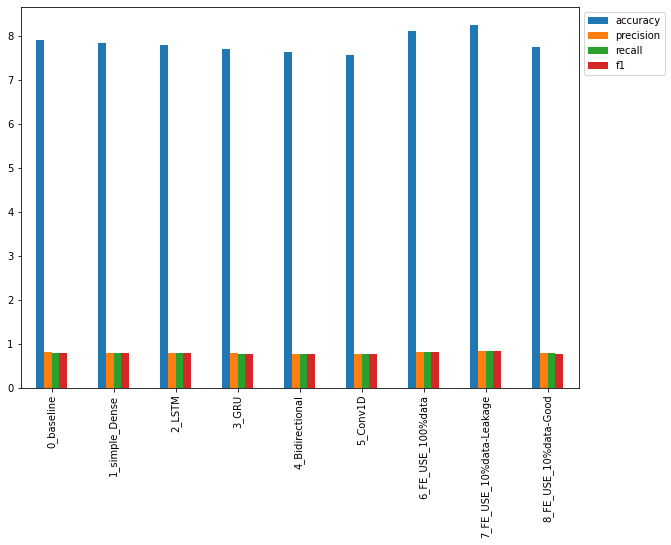

In [ ]:
#Plot and comparrre of all the model results
model_all_evaluation.plot(kind="bar",figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0))

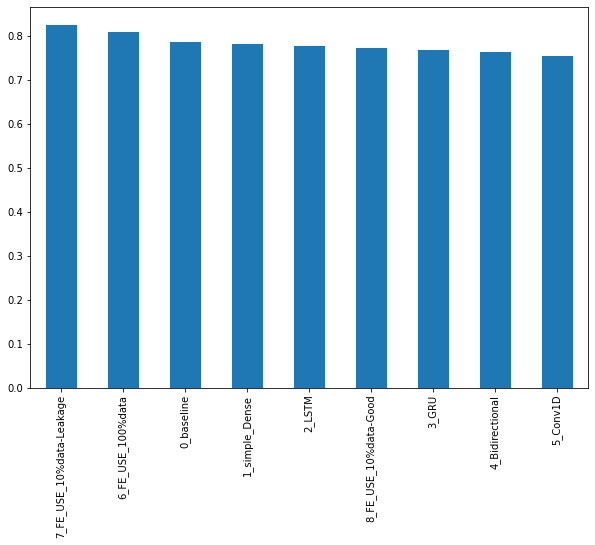

In [ ]:
# Sort model results by f1-score
model_all_evaluation.sort_values("f1",ascending=False)["f1"].plot(kind="bar",figsize=(10,7))

## Uploading model training logs to tensorboard.dev

In [ ]:
#Uploading Tensorboard dev records
#!tensorboard dev upload --logdir ./model_logs/ \
#--name "NLP Modelling Experiments" \
#--description "Comparing multiple types of architectures on Kaggle DS" \
#--one_shot #exit uploader once uploading is finished


In [ ]:
#See previous tensorboard dev experiments that were run
#!tensorboard dev list

In [ ]:
#To delete some stensorboard experiment to not people see it
##!tensorboard dev delete --experiment_id W6nWaSdAQ66znSb3uJECMA

#Weights and biases jest innym narzędziem do oglądania experymentów - POLEANY

# **Resource** 
- For largers experimenting Weights and Biases are even *better* than Tensorboard

In [ ]:
tf.__version__

'2.11.0'

## Saving a model 
- One of format is HDF5
- The Savedmodel format (default in Tensorflow)

In [ ]:
#Save TF Hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")

In [ ]:
#Load model with custom Hub layer (required with HDF5 format)
import tensorflow_hub as hub
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [ ]:
#How does loaded model perform?
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 8ms/step - loss: 0.4273 - accuracy: 0.8123


[0.42728129029273987, 0.8123359680175781]

In [ ]:
model_6_results

{'accuracy': 81.23359580052494,
 'precision': 0.8163219290181186,
 'recall': 0.8123359580052494,
 'f1': 0.8102465800135692}

In [ ]:
#Save TF Hub Sentence Encoder model to savemodel format
model_6.save("model_6_savedmodel_format")

In [ ]:
loaded_model_savedformat_6 = tf.keras.models.load_model("model_6_savedmodel_format")
loaded_model_savedformat_6.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 8ms/step - loss: 0.4273 - accuracy: 0.8123


[0.42728129029273987, 0.8123359680175781]

In [ ]:
#from google.colab import files
#files.download('model_6_savedmodel_format')

# Evaluating further - searching for worst predictions
- Investigate why some predictions were extremely bad, maybe some mistakes in data set

In [ ]:
model_6_pred_probs[:10], len(model_6_pred_probs), len(val_labels), len(model_6_predicts)

(array([[0.1787136 ],
        [0.7383488 ],
        [0.99202996],
        [0.20612627],
        [0.70278484],
        [0.66898876],
        [0.9793355 ],
        [0.97692686],
        [0.95178217],
        [0.09976571]], dtype=float32), 762, 762, 762)

In [ ]:
val_labels[:10], model_6_predicts[:10]

(array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0]),
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>)

In [ ]:
pred_investigation = pd.DataFrame({"pred_probs":tf.squeeze(model_6_pred_probs),
                                   "predictions":model_6_predicts,
                                   "true_labels":val_labels,
                                   "sentences": val_sentences})
pred_investigation

,pred_probs,predictions,true_labels,sentences
0,0.178714,0.0,0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...
1,0.738349,1.0,0,FedEx no longer to transport bioterror germs i...
2,0.992030,1.0,1,Gunmen kill four in El Salvador bus attack: Su...
3,0.206126,0.0,1,@camilacabello97 Internally and externally scr...
4,0.702785,1.0,1,Radiation emergency #preparedness starts with ...
...,...,...,...,...
757,0.102956,0.0,0,That's the ultimate road to destruction
758,0.130180,0.0,0,@SetZorah dad why dont you claim me that mean ...
759,0.878309,1.0,0,FedEx will no longer transport bioterror patho...
760,0.623299,1.0,0,Crack in the path where I wiped out this morni...


##Visualizing the most wrong FALSE POSITIVES

In [ ]:
pred_investigation["correct"] = pred_investigation["predictions"] == pred_investigation["true_labels"]
pred_investigation

,pred_probs,predictions,true_labels,sentences,correct
0,0.178714,0.0,0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,True
1,0.738349,1.0,0,FedEx no longer to transport bioterror germs i...,False
2,0.992030,1.0,1,Gunmen kill four in El Salvador bus attack: Su...,True
3,0.206126,0.0,1,@camilacabello97 Internally and externally scr...,False
4,0.702785,1.0,1,Radiation emergency #preparedness starts with ...,True
...,...,...,...,...,...
757,0.102956,0.0,0,That's the ultimate road to destruction,True
758,0.130180,0.0,0,@SetZorah dad why dont you claim me that mean ...,True
759,0.878309,1.0,0,FedEx will no longer transport bioterror patho...,False
760,0.623299,1.0,0,Crack in the path where I wiped out this morni...,False


In [ ]:
pred_investigation_false = pred_investigation[pred_investigation["correct"]==False].sort_values("pred_probs",ascending=False)
pred_investigation_false

,pred_probs,predictions,true_labels,sentences,correct
31,0.897292,1.0,0,? High Skies - Burning Buildings ? http://t.co...,False
759,0.878309,1.0,0,FedEx will no longer transport bioterror patho...,False
628,0.871702,1.0,0,@noah_anyname That's where the concentration c...,False
251,0.837132,1.0,0,@AshGhebranious civil rights continued in the ...,False
49,0.813412,1.0,0,@madonnamking RSPCA site multiple 7 story high...,False
...,...,...,...,...,...
59,0.049109,0.0,1,You can never escape me. Bullets don't harm me...,False
233,0.046055,0.0,1,I get to smoke my shit in peace,False
38,0.044564,0.0,1,Why are you deluged with low self-image? Take ...,False
23,0.036711,0.0,1,Ron &amp; Fez - Dave's High School Crush https...,False


In [ ]:
pred_investigation_false["predictions"].value_counts()

0.0    98
1.0    45
Name: predictions, dtype: int64

In [ ]:
for row in pred_investigation_false[['sentences','pred_probs']][0:10].itertuples():
  _,sentence,pred_probs =row
  print(f"Pred probability: {pred_probs} - Predicted as", " real disaster." if tf.round(pred_probs)==1 else "not real disaster" )
  print(f"\nSentence: {sentence}")
  print("----\n")

Pred probability: 0.8972917795181274 - Predicted as  real disaster.

Sentence: ? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying
----

Pred probability: 0.878308892250061 - Predicted as  real disaster.

Sentence: FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J
----

Pred probability: 0.8717024326324463 - Predicted as  real disaster.

Sentence: @noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.
----

Pred probability: 0.837131917476654 - Predicted as  real disaster.

Sentence: @AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.
----

Pred probability: 0.8134124875068665 - Predicted as  real disaster.

Sentence: @madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods
----

Pred probability: 0.81217688322067

##Visualizing the most wrong FALSE NEGATIVES

In [ ]:
pred_investigation_false2 = pred_investigation[pred_investigation["correct"]==False].sort_values("pred_probs")
pred_investigation_false2

,pred_probs,predictions,true_labels,sentences,correct
244,0.036258,0.0,1,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,False
23,0.036711,0.0,1,Ron &amp; Fez - Dave's High School Crush https...,False
38,0.044564,0.0,1,Why are you deluged with low self-image? Take ...,False
233,0.046055,0.0,1,I get to smoke my shit in peace,False
59,0.049109,0.0,1,You can never escape me. Bullets don't harm me...,False
...,...,...,...,...,...
49,0.813412,1.0,0,@madonnamking RSPCA site multiple 7 story high...,False
251,0.837132,1.0,0,@AshGhebranious civil rights continued in the ...,False
628,0.871702,1.0,0,@noah_anyname That's where the concentration c...,False
759,0.878309,1.0,0,FedEx will no longer transport bioterror patho...,False


In [ ]:
for row in pred_investigation_false2[['sentences','pred_probs']][0:10].itertuples():
  _,sentence,pred_probs =row
  print(f"Pred probability: {pred_probs} - Predicted as", " real disaster." if tf.round(pred_probs)==1 else "not real disaster" )
  print(f"\nSentence: {sentence}")
  print("----\n")

Pred probability: 0.036258067935705185 - Predicted as not real disaster

Sentence: Reddit Will Now QuarantineÛ_ http://t.co/pkUAMXw6pm #onlinecommunities #reddit #amageddon #freespeech #Business http://t.co/PAWvNJ4sAP
----

Pred probability: 0.03671137988567352 - Predicted as not real disaster

Sentence: Ron &amp; Fez - Dave's High School Crush https://t.co/aN3W16c8F6 via @YouTube
----

Pred probability: 0.0445636585354805 - Predicted as not real disaster

Sentence: Why are you deluged with low self-image? Take the quiz: http://t.co/XsPqdOrIqj http://t.co/CQYvFR4UCy
----

Pred probability: 0.046054523438215256 - Predicted as not real disaster

Sentence: I get to smoke my shit in peace
----

Pred probability: 0.04910905286669731 - Predicted as not real disaster

Sentence: You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.
----

Pred probability: 0.04937414079904556 - Predicted as not real disaster

As told before, there are same sequences which are just wrongly labeled... That's was the main purpose of that investigation

#Making prediction on test dataset

In [ ]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [ ]:
X = test_df["text"].to_list()
X[:5]

['Just happened a terrible car crash',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
 'Apocalypse lighting. #Spokane #wildfires',
 'Typhoon Soudelor kills 28 in China and Taiwan']

In [ ]:
test_samples = random.sample(X,10)
for test_sample in test_samples:
  pred_prob=tf.squeeze(model_6.predict([test_sample])) #Model expect list as input
  pred=tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n {test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 38ms/step
Pred: 0, Prob: 0.3785380423069
Text:
 RT SIGN URGENT Stop the Annihilation of the Salt River Wild Horses!!! #savewildhorses #saltriverhorses https://t.co/8AZjFF8eSi

----

1/1 [==============================] - 0s 37ms/step
Pred: 0, Prob: 0.3348909616470337
Text:
 ASSIST - CITIZEN OR AGENCY at NE LLOYD BLVD / NE OREGON ST [Portland Police #PP15000266835] 17:11 #pdx911

----

1/1 [==============================] - 0s 33ms/step
Pred: 1, Prob: 0.7262198328971863
Text:
 @adolwyn This near U? @JWagstaffe: RT @OldsFireDept: Aug 5 2015 Hwy27 west of Olds. Approximately 1 foot of hail. http://t.co/Yg0pd73Bpw'

----

1/1 [==============================] - 0s 39ms/step
Pred: 1, Prob: 0.7704859375953674
Text:
 The Murderous Story Of AmericaÛªs First Hijacking http://t.co/VgBOpxb6Wg

----

1/1 [==============================] - 0s 40ms/step
Pred: 0, Prob: 0.47504836320877075
Text:
 The sinkhole that ate Brooklyn http://t.co/28r2IgxmIE

----

1/1

In [ ]:
X[:10]

['Just happened a terrible car crash',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
 'Apocalypse lighting. #Spokane #wildfires',
 'Typhoon Soudelor kills 28 in China and Taiwan',
 "We're shaking...It's an earthquake",
 "They'd probably still show more life than Arsenal did yesterday, eh? EH?",
 'Hey! How are you?',
 'What a nice hat?',
 'Fuck off!']

In [ ]:
model_6.predict(X)

102/102 [==============================] - 1s 8ms/step


array([[0.6182498 ],
       [0.87685215],
       [0.81063414],
       ...,
       [0.9185196 ],
       [0.45505336],
       [0.6867426 ]], dtype=float32)

In [ ]:
model_6.predict(["Kiedy wersow tak przytyła?"]) # XD

1/1 [==============================] - 0s 34ms/step


array([[0.33595568]], dtype=float32)

# The speed/score trafeoff

In [ ]:
#Make a function to measure the time of prediction
import time
def pred_timer(model,samples):
  '''
  Times how long a model takes to make predictions on samples.
  '''
  start_time = time.perf_counter()#get start time
  model.predict(samples)#make prediction
  end_time = time.perf_counter()#Get finish time
  total_time = end_time-start_time#Calculate how long it take to make predictions
  time_per_pred = total_time/len(samples)

  return total_time, time_per_pred


In [ ]:
#Calculate TF Hub Sentence Encoder time per pred
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model=model_6,
                                                          samples=val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 0s 8ms/step


(0.34709781800000883, 0.0004555089475065733)

In [ ]:
#Calculate baseline model time per pred
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model=model_0,
                                                              samples=val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.01669431599998461, 2.1908551181082164e-05)

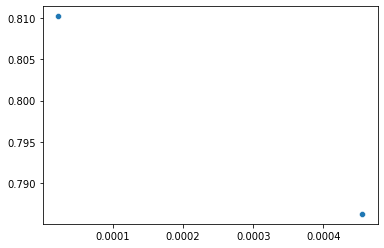

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=[model_6_time_per_pred,baseline_time_per_pred], y = [baseline_result["f1"],model_6_results["f1"]])

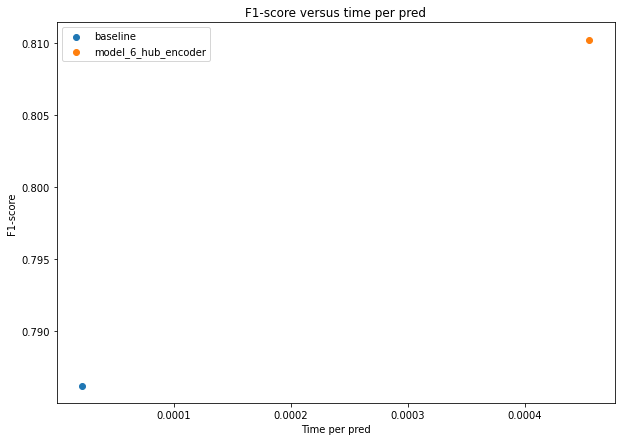

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(baseline_time_per_pred,baseline_result["f1"],label="baseline")
plt.scatter(model_6_time_per_pred,model_6_results["f1"],label="model_6_hub_encoder")
plt.legend()
plt.ylabel("F1-score")
plt.xlabel("Time per pred")
plt.title("F1-score versus time per pred");

# Build model 9 with fine tuning

In [ ]:
#Create callbacks
SAVE_DIR = "model_logs"
import tensorflow as tf

tensorboard_callback =hp.create_tensorboard_callback(SAVE_DIR,
                                                     "USE_FINE_MODEL9")
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("fine_tune_checkpoints/",
                                                               monitor="val_loss",
                                                               save_best_only=True,
                                                               save_weight_only=True,
                                                               verbose=1)
Early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                           patience=3,
                                                           verbose=1)
LearningRateScheduler = tf.keras.callbacks.ReduceLROnPlateau(patience=2,
                                                             monitor="val_loss",
                                                             factor=0.2,
                                                             min_lr=1e-7)

Saving TensorBoard log files to: model_logs/USE_FINE_MODEL9/20230221-171715


In [ ]:
#Build the model

from tensorflow.keras import layers
import tensorflow_hub as hub
seq_encode_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                  input_shape=[],
                                  trainable=True,
                                  dtype=tf.string,
                                  name="fine_USE")
model_9 = tf.keras.Sequential([
    seq_encode_layer,
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")
])

#Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.0001),
                metrics = ["accuracy"])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
#Fit the model
history_9 = model_9.fit(train_sentences,
                        train_labels,
                        epochs=30,
                        validation_data=(val_sentences,val_labels),
                        callbacks=[tensorboard_callback,
                                   model_checkpoint_callback,
                                   Early_stopping_callback,
                                   LearningRateScheduler])

Epoch 1/30
215/215 [==============================] - ETA: 0s - loss: 0.5810 - accuracy: 0.7249
Epoch 1: val_loss improved from inf to 0.49521, saving model to fine_tune_checkpoints/


215/215 [==============================] - 596s 3s/step - loss: 0.5810 - accuracy: 0.7249 - val_loss: 0.4952 - val_accuracy: 0.7861 - lr: 1.0000e-04
Epoch 2/30
215/215 [==============================] - ETA: 0s - loss: 0.4309 - accuracy: 0.8158
Epoch 2: val_loss improved from 0.49521 to 0.43935, saving model to fine_tune_checkpoints/


215/215 [==============================] - 677s 3s/step - loss: 0.4309 - accuracy: 0.8158 - val_loss: 0.4394 - val_accuracy: 0.8097 - lr: 1.0000e-04
Epoch 3/30
215/215 [==============================] - ETA: 0s - loss: 0.3556 - accuracy: 0.8533
Epoch 3: val_loss improved from 0.43935 to 0.42542, saving model to fine_tune_checkpoints/


215/215 [==============================] - 680s 3s/step - loss: 0.3556 - accuracy: 0.8533 - val_loss: 0.4254 - val_accuracy: 0.8281 - lr: 1.0000e-04
Epoch 4/30
215/215 [==============================] - ETA: 0s - loss: 0.2890 - accuracy: 0.8834
Epoch 4: val_loss did not improve from 0.42542
215/215 [==============================] - 701s 3s/step - loss: 0.2890 - accuracy: 0.8834 - val_loss: 0.4313 - val_accuracy: 0.8268 - lr: 1.0000e-04
Epoch 5/30
215/215 [==============================] - ETA: 0s - loss: 0.2165 - accuracy: 0.9180
Epoch 5: val_loss did not improve from 0.42542
215/215 [==============================] - 677s 3s/step - loss: 0.2165 - accuracy: 0.9180 - val_loss: 0.4505 - val_accuracy: 0.8307 - lr: 1.0000e-04
Epoch 6/30
215/215 [==============================] - ETA: 0s - loss: 0.1536 - accuracy: 0.9485
Epoch 6: val_loss did not improve from 0.42542
215/215 [==============================] - 676s 3s/step - loss: 0.1536 - accuracy: 0.9485 - val_loss: 0.4592 - val_accuracy:

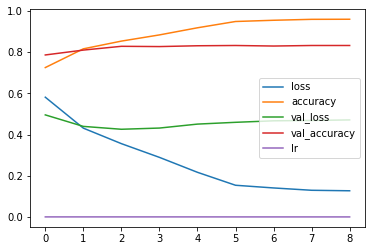

In [ ]:
import pandas as pd
pd.DataFrame(history_9.history).plot()

## Evaluate final model


In [ ]:
X = test_df["text"].to_list()
preds_probs = model_9.predict(X)
predicts = tf.squeeze(tf.round(preds_probs))
predicts[:10]

102/102 [==============================] - 1s 9ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0.], dtype=float32)>

In [ ]:
preds_int = [int(x) for x in predicts]
preds_int[:10], len(preds_int)==len(predicts)==len(preds_probs)

([1, 1, 1, 1, 1, 1, 0, 0, 0, 0], True)

#Submission to kaggle

In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
submission = test_df[["id"]]
submission["target"] = preds_int

<ipython-input-38-5b52e2b46674>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["target"] = preds_int


In [ ]:
submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [ ]:
submission.to_csv("NLP.csv",index=None)

In [ ]:
pd.read_csv("NLP.csv")

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


## Improving model

- One crucial step would be to repair some wrongly labeled sentences, because as it was seen. There are at least few of them, which interrupts model a lot.